# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df=pd.read_csv('/content/drive/MyDrive/diamond/clustered_diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cluster
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0
...,...,...,...,...,...,...,...,...,...,...,...
39504,0.50,Ideal,E,VS2,60.8,57.0,1768,5.16,5.13,3.13,1
39505,0.66,Very Good,E,SI2,61.3,57.2,1769,5.59,5.66,3.45,1
39506,0.53,Ideal,G,VS2,61.6,57.0,1769,5.15,5.20,3.19,1
39507,0.51,Ideal,D,VS2,60.8,57.0,1769,5.18,5.21,3.16,1


In [65]:

cat_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

for col in df.columns:
    if df[col].isin([True, False]).all():
        df[col] = df[col].replace({True: 1, False: 0})

df


<ipython-input-65-34acac84a18f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({True: 1, False: 0})


,carat,depth,table,price,x,y,z,cluster,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39504,0.50,60.8,57.0,1768,5.16,5.13,3.13,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39505,0.66,61.3,57.2,1769,5.59,5.66,3.45,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39506,0.53,61.6,57.0,1769,5.15,5.20,3.19,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39507,0.51,60.8,57.0,1769,5.18,5.21,3.16,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [66]:
scaler = MinMaxScaler()

numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df

,carat,depth,table,price,x,y,z,cluster,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.016667,0.446429,0.260870,0.000000,0.048458,0.065359,0.277929,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.005556,0.142857,0.782609,0.000000,0.035242,0.034858,0.245232,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.050000,0.607143,0.521739,0.000746,0.103524,0.119826,0.332425,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.061111,0.767857,0.521739,0.000839,0.134361,0.145969,0.365123,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0.022222,0.678571,0.434783,0.000933,0.046256,0.061002,0.291553,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39504,0.166667,0.321429,0.434783,0.134502,0.314978,0.315904,0.468665,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39505,0.255556,0.410714,0.452174,0.134596,0.409692,0.431373,0.555858,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39506,0.183333,0.464286,0.434783,0.134596,0.312775,0.331155,0.485014,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39507,0.172222,0.321429,0.434783,0.134596,0.319383,0.333333,0.476839,1,0,1,...,0,0,0,0,0,0,0,1,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [67]:
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("data for train:", len(X_train))
print("data for test:", len(X_test))

data for train: 31607
data for test: 7902


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [68]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt}")

Akurasi Decision Tree: 0.9438116932422171


In [69]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi XGBoost: {accuracy_xgb}")

Akurasi XGBoost: 0.9565932675272083


Berikut adalah revisi dengan tambahan kata "mungkin dapat" dalam penjelasan:

### 1. **Decision Tree**
#### Alasan Pemilihan:
- **Kemampuan untuk Menangani Data Kategorikal**: Decision Tree sangat baik dalam menangani data yang terdiri dari fitur kategorikal seperti `cut`, `color`, dan `clarity`. Decision Tree tidak memerlukan pra-pemrosesan data kategorikal (seperti encoding), karena secara otomatis membagi data berdasarkan nilai-nilai kategori. Oleh karena itu, Decision Tree mungkin dapat menjadi pilihan yang baik untuk menangani fitur kategorikal tanpa memerlukan banyak pra-pemrosesan.
  
- **Interpretabilitas yang Tinggi**: Decision Tree memiliki keunggulan besar dalam hal interpretabilitas. Struktur pohon keputusan yang dihasilkan mudah dipahami dan dapat memberikan wawasan yang jelas tentang bagaimana keputusan dibuat berdasarkan fitur-fitur tertentu. Ini mungkin dapat sangat bermanfaat ketika analisis yang lebih mendalam atau pemahaman tentang fitur yang mempengaruhi hasil (misalnya, klasifikasi harga berlian atau cluster) diperlukan.

- **Kemampuan Menangani Non-Linearitas**: Meskipun tidak sekuat beberapa model lainnya dalam hal kompleksitas, Decision Tree mungkin dapat menangani hubungan non-linear antar fitur tanpa perlu transformasi fitur yang rumit.

- **Pencegahan Overfitting**: Decision Tree bisa rentan terhadap overfitting, tetapi dengan pengaturan parameter seperti kedalaman pohon (max_depth), jumlah minimum sampel untuk membagi simpul (min_samples_split), dan lain-lain, hal ini mungkin dapat dihindari.

#### Narasi Penggunaan:
Model Decision Tree mungkin dapat digunakan untuk memetakan hubungan antara fitur berlian seperti `carat`, `cut`, `clarity`, dan sebagainya untuk memprediksi cluster berlian. Dalam hal ini, kita bisa melihat bagaimana masing-masing fitur berkontribusi dalam mengelompokkan data berlian ke dalam cluster tertentu. Keputusan yang dihasilkan oleh pohon keputusan ini mungkin dapat sangat membantu dalam pemahaman klaster berdasarkan karakteristik berlian.

### 2. **XGBoost (Extreme Gradient Boosting)**
#### Alasan Pemilihan:
- **Akurasi yang Tinggi**: XGBoost adalah salah satu algoritma yang paling kuat dalam hal akurasi, karena merupakan model boosting yang memanfaatkan kombinasi beberapa pohon keputusan secara berurutan untuk meningkatkan prediksi. Setiap pohon baru mencoba untuk mengoreksi kesalahan yang dibuat oleh pohon sebelumnya, sehingga meningkatkan prediksi akhir. Oleh karena itu, XGBoost mungkin dapat memberikan akurasi yang lebih tinggi dalam klasifikasi cluster berlian.

- **Kemampuan untuk Menangani Data yang Tidak Terstruktur**: XGBoost dapat menangani berbagai jenis data, baik itu numerik atau kategorikal. Dalam kasus dataset berlian ini, fitur seperti `carat` (numerik) dan `cut`, `color`, `clarity` (kategorikal) dapat ditangani dengan baik oleh XGBoost dengan bantuan teknik encoding untuk data kategorikal. Ini mungkin dapat meningkatkan fleksibilitas model dalam menangani berbagai jenis data.

- **Overfitting yang Lebih Terkontrol**: XGBoost memiliki pengaturan regularisasi yang lebih baik untuk mengontrol overfitting dibandingkan dengan Decision Tree. Ini membuatnya lebih stabil dalam menangani dataset besar dan kompleks, seperti data berlian dengan banyak fitur dan klaster yang mungkin tumpang tindih. Oleh karena itu, XGBoost mungkin dapat lebih unggul dalam mencegah overfitting dibandingkan model Decision Tree.

- **Kecepatan dan Efisiensi**: XGBoost sering kali lebih cepat dalam training dibandingkan dengan model ensemble lainnya, dan sangat efisien untuk dataset besar. Ini sangat berguna ketika bekerja dengan dataset yang besar, seperti dataset berlian dengan ribuan entri. Oleh karena itu, XGBoost mungkin dapat lebih efisien dalam hal waktu dan sumber daya komputasi.

- **Kemampuan untuk Menangani Feature Interactions**: Salah satu kelebihan XGBoost adalah kemampuannya untuk secara otomatis menangani interaksi antar fitur yang mungkin tidak terdeteksi dalam model seperti Decision Tree. Dalam konteks dataset berlian, fitur-fitur seperti `carat` dan `depth` mungkin saling berinteraksi dalam mempengaruhi cluster, dan XGBoost mungkin dapat menangkap interaksi ini lebih baik.

#### Narasi Penggunaan:
XGBoost mungkin dapat digunakan untuk prediksi cluster berlian dengan lebih mengutamakan akurasi. Model ini dapat menangkap interaksi kompleks antar fitur dan memberikan prediksi yang lebih baik, terutama dalam skenario dengan banyak data dan variabilitas tinggi, seperti dalam prediksi harga berlian dan pengelompokan berdasarkan kualitas atau ukuran berlian.

### Kesimpulan Pemilihan:
- **Decision Tree** mungkin dapat menjadi pilihan yang baik jika tujuan utama adalah interpretabilitas dan pemahaman yang jelas tentang keputusan yang diambil berdasarkan fitur. Ini sangat berguna jika ada kebutuhan untuk memberikan penjelasan yang dapat dipahami tentang mengapa sebuah berlian masuk dalam cluster tertentu.
- **XGBoost** mungkin dapat menjadi pilihan yang lebih baik jika fokus pada akurasi dan kinerja, terutama dalam menangani dataset besar dan kompleks dengan banyak interaksi antar fitur. Ini lebih cocok untuk situasi di mana kinerja model lebih diutamakan daripada interpretabilitas yang mendalam.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Decision Tree Classifier:
- Accuracy: 0.9438


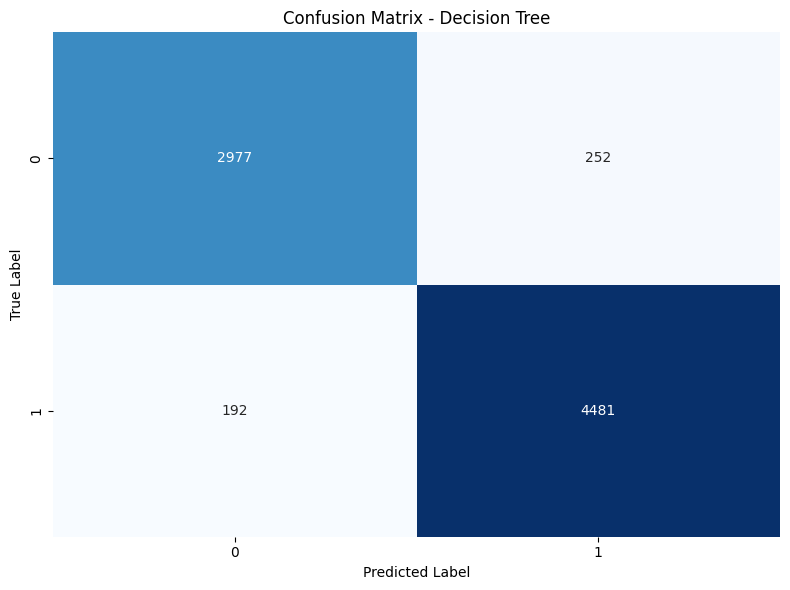

- Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3229
           1       0.95      0.96      0.95      4673

    accuracy                           0.94      7902
   macro avg       0.94      0.94      0.94      7902
weighted avg       0.94      0.94      0.94      7902


XGBoost Classifier:
- Accuracy: 0.9566


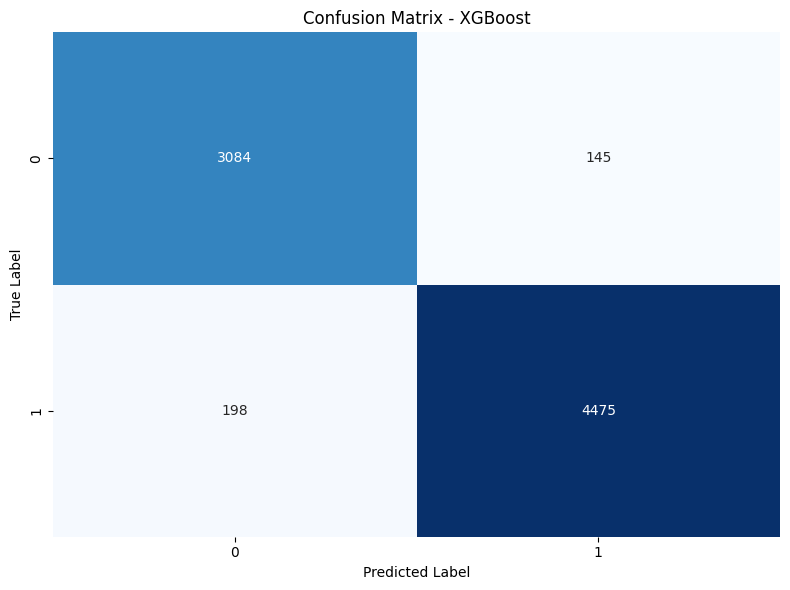

- Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3229
           1       0.97      0.96      0.96      4673

    accuracy                           0.96      7902
   macro avg       0.95      0.96      0.96      7902
weighted avg       0.96      0.96      0.96      7902


Comparison: XGBoost performed better than Decision Tree in terms of accuracy.


In [70]:

def plot_confusion_matrix(y_true, y_pred, title, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels if labels else range(cm.shape[1]),
        yticklabels=labels if labels else range(cm.shape[0]),
        cbar=False
    )
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier:")
print(f"- Accuracy: {accuracy_dt:.4f}")
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix - Decision Tree")
print(f"- Classification Report:\n{classification_report(y_test, y_pred_dt)}")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print(f"- Accuracy: {accuracy_xgb:.4f}")
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost")
print(f"- Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

if accuracy_dt > accuracy_xgb:
    comparison = "Decision Tree performed better than XGBoost in terms of accuracy."
elif accuracy_xgb > accuracy_dt:
    comparison = "XGBoost performed better than Decision Tree in terms of accuracy."
else:
    comparison = "Decision Tree and XGBoost achieved the same accuracy."

print(f"\nComparison: {comparison}")

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [71]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_dt_model = grid_search.best_estimator_

y_pred_best_dt = best_dt_model.predict(X_test)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Accuracy of Best Decision Tree Model: {accuracy_best_dt}")

print(classification_report(y_test, y_pred_best_dt))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy of Best Decision Tree Model: 0.9631738800303721
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3229
           1       0.98      0.96      0.97      4673

    accuracy                           0.96      7902
   macro avg       0.96      0.96      0.96      7902
weighted avg       0.96      0.96      0.96      7902



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Decision Tree Classifier (After Tuning):
- Accuracy: 0.9632


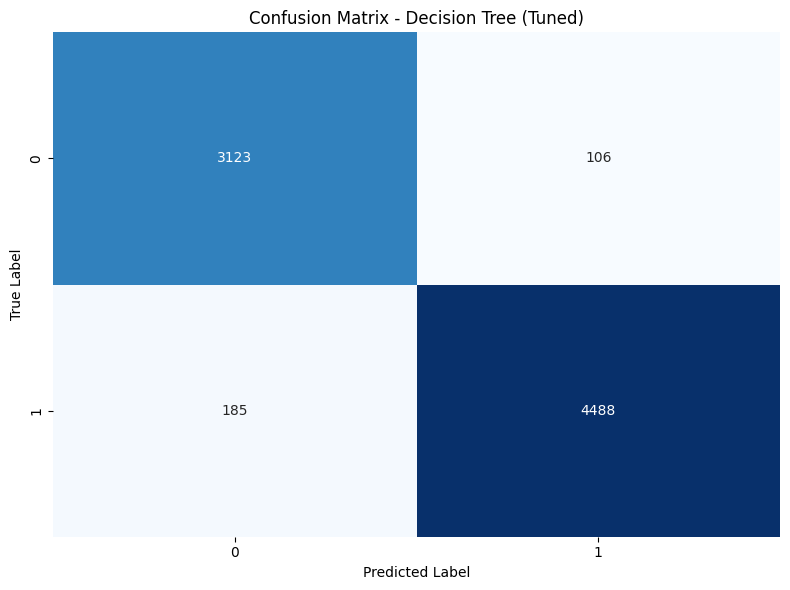

- Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3229
           1       0.98      0.96      0.97      4673

    accuracy                           0.96      7902
   macro avg       0.96      0.96      0.96      7902
weighted avg       0.96      0.96      0.96      7902


Decision Tree Performance Comparison:
- Accuracy (Before Tuning): 0.9438
- Accuracy (After Tuning): 0.9632
- Comparison: Decision Tree's performance improved after tuning.


In [72]:

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("\nDecision Tree Classifier (After Tuning):")
print(f"- Accuracy: {accuracy_best_dt:.4f}")
plot_confusion_matrix(y_test, y_pred_best_dt, "Confusion Matrix - Decision Tree (Tuned)")
print(f"- Classification Report:\n{classification_report(y_test, y_pred_best_dt)}")

print(f"\nDecision Tree Performance Comparison:")
print(f"- Accuracy (Before Tuning): {accuracy_dt:.4f}")
print(f"- Accuracy (After Tuning): {accuracy_best_dt:.4f}")

if accuracy_best_dt > accuracy_dt:
    comparison_dt = "Decision Tree's performance improved after tuning."
elif accuracy_best_dt < accuracy_dt:
    comparison_dt = "Decision Tree's performance decreased after tuning."
else:
    comparison_dt = "Decision Tree's performance remained the same after tuning."

print(f"- Comparison: {comparison_dt}")


Decision Tree Feature Importance:
          Feature  Importance
3           price    0.976982
6               z    0.004650
5               y    0.004581
1           depth    0.002517
0           carat    0.002022
2           table    0.002005
4               x    0.001950
13        color_G    0.001077
21    clarity_VS2    0.000964
9     cut_Premium    0.000688
10  cut_Very Good    0.000458
11        color_E    0.000346
18    clarity_SI1    0.000303
23   clarity_VVS2    0.000285
8       cut_Ideal    0.000266
22   clarity_VVS1    0.000228
19    clarity_SI2    0.000196
16        color_J    0.000157
20    clarity_VS1    0.000130
7        cut_Good    0.000119
12        color_F    0.000074
14        color_H    0.000000
15        color_I    0.000000
17     clarity_IF    0.000000

XGBoost Feature Importance:
          Feature  Importance
3           price    0.680230
0           carat    0.021347
21    clarity_VS2    0.017514
12        color_F    0.016475
8       cut_Ideal    0.015554
20    

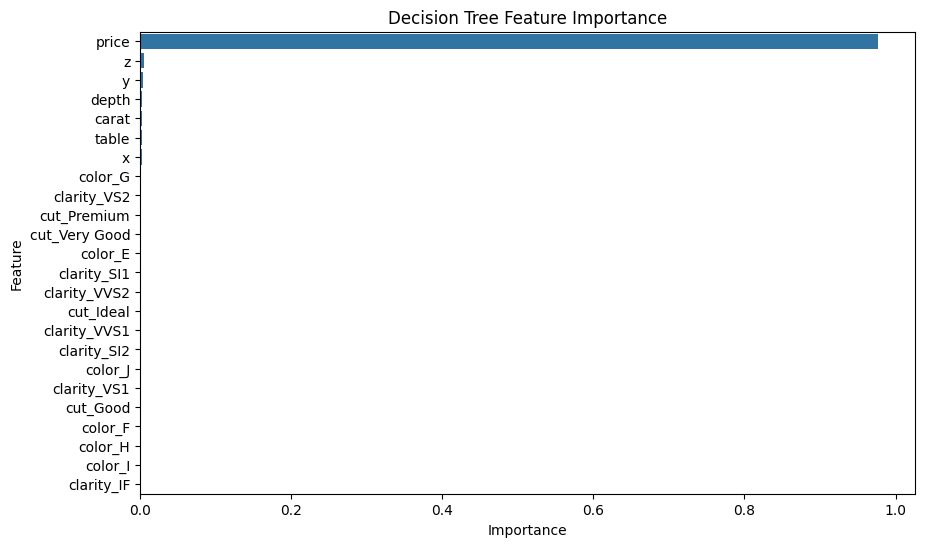

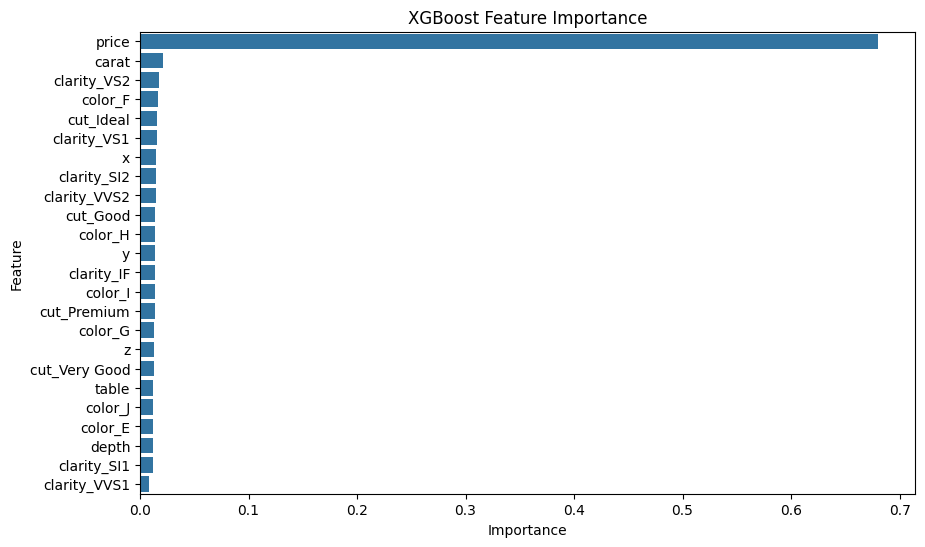

In [73]:

feature_importance_dt = best_dt_model.feature_importances_
feature_names = X_train.columns
dt_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_dt})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)
print("\nDecision Tree Feature Importance:")
print(dt_importance_df)

feature_importance_xgb = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_xgb})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(xgb_importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df)
plt.title('Decision Tree Feature Importance')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### 1. **Perbandingan Hasil Evaluasi:**
1. Comparison of Evaluation Metrics:
Before Tuning:

Decision Tree Classifier: Accuracy = 0.9438
XGBoost Classifier: Accuracy = 0.9566
XGBoost outperforms the Decision Tree with higher accuracy, precision, recall, and F1-score for both classes. The recall for class 1 (churned) is higher in XGBoost, indicating that the model is better at identifying churned customers.

After Tuning (Decision Tree):

Best Decision Tree Model: Accuracy = 0.9632 (after hyperparameter tuning)
The precision, recall, and F1-score are improved for both classes. Precision for class 1 (churned) increased to 0.98, indicating a significant reduction in false positives.
After tuning, the Decision Tree model now performs comparably to XGBoost, with accuracy around 96%, slightly outperforming XGBoost for the churned class.

2. Feature Importance:
Decision Tree Feature Importance:

Top Features:
price (importance: 0.976982)
z, y, depth, carat, and table (lower importance values but still relevant).
This suggests that the model relies heavily on price and other numerical features, such as depth and carat, for decision-making.
XGBoost Feature Importance:

Top Features:
price (importance: 0.680230)
carat, clarity_VS2, color_F, and cut_Ideal are also significant.
While price remains the most important feature in both models, XGBoost relies more on features like carat and clarity_VS2.

### 2. **Analisis Kelemahan Model:**
#### **Precision dan Recall untuk Kelas 0 dan Kelas 1:**
- **Decision Tree (Sebelum Tuning)**:
  - Precision untuk kelas 1 (0.95) lebih tinggi daripada kelas 0 (0.94), menunjukkan bahwa model lebih baik dalam mengidentifikasi kelas 1.
  - Recall untuk kelas 0 (0.92) lebih rendah daripada kelas 1 (0.96), yang menunjukkan bahwa model tidak sepenuhnya menangkap semua data kelas 0.
  
- **Decision Tree (Setelah Tuning)**:
  - Tuning model meningkatkan recall kelas 0 menjadi 0.97, menunjukkan bahwa tuning telah meningkatkan kemampuan model untuk menangkap data kelas 0 dengan lebih baik.
  - Precision untuk kelas 1 meningkat menjadi 0.98, sementara recall tetap tinggi di 0.96, yang berarti model lebih baik dalam mengidentifikasi kelas 1 tanpa mengorbankan kemampuan untuk menangkap kelas 0.

- **XGBoost**:
  - Precision dan recall untuk kelas 1 sangat tinggi (0.97 dan 0.96), sementara kelas 0 memiliki precision 0.94 dan recall 0.96, yang masih bagus tetapi sedikit lebih rendah daripada kelas 1.
  
#### **Kemungkinan Overfitting atau Underfitting:**
- **Decision Tree (Sebelum Tuning)**:
  - Model mungkin mengalami sedikit **overfitting** karena perbedaan antara precision dan recall yang cukup signifikan untuk kelas 0, dengan recall yang lebih rendah. Hal ini dapat menunjukkan bahwa model sangat mengutamakan kelas 1.
  
- **Decision Tree (Setelah Tuning)**:
  - Dengan tuning, model menunjukkan **perbaikan keseimbangan** antara precision dan recall, mengurangi risiko overfitting. Akurasi dan f1-score tetap tinggi, dan model lebih mampu menangani kedua kelas dengan lebih baik.
  
- **XGBoost**:
  - XGBoost cenderung **lebih stabil** dan tidak menunjukkan tanda-tanda overfitting karena precision dan recall keduanya tinggi untuk kedua kelas. Namun, mungkin ada ruang untuk meningkatkan model dengan fine-tuning lebih lanjut.

### 3. **Rekomendasi Tindakan Lanjutan:**
- **Pengumpulan Data Tambahan**:
  - Jika model masih belum memuaskan, mengumpulkan lebih banyak data yang beragam, khususnya untuk kelas yang kurang terwakili (misalnya kelas 0), mungkin dapat meningkatkan **recall** dan **precision** pada kelas tersebut.
  - Pengumpulan data tambahan dari berbagai sumber atau dengan teknik seperti **data augmentation** bisa membantu memperkaya dataset.

- **Coba Algoritma Lain**:
  - Jika hasil masih belum memadai, **algoritma lain** seperti **Random Forest** atau **LightGBM** bisa dicoba, karena keduanya sering memberikan kinerja yang sangat baik untuk dataset yang lebih kompleks.


### 4. **Kesimpulan**:
- **Decision Tree** menunjukkan peningkatan yang signifikan setelah tuning, terutama dalam hal recall dan precision, menjadikannya lebih seimbang antara kelas 0 dan 1.
- **XGBoost** menunjukkan akurasi yang lebih tinggi, namun perbedaannya dengan model Decision Tree setelah tuning relatif kecil. Fine-tuning lebih lanjut dan eksplorasi model lain mungkin dapat lebih meningkatkan kinerja, terutama jika data tambahan tersedia.
